In [3]:
import testing_wing

ModuleNotFoundError: No module named 'testing_wing'

In [2]:
import paneltime as pt
import pandas as pd
import numpy as np
import time

Multi core processing enabled using 1 cores. 

Master PID: 15160 

Slave PIDs: 
15160
parallel: 0.07277345657348633
Multi core processing enabled using 10 cores. 

Master PID: 15160 

Slave PIDs: 
16400, 18620, 17452, 20280, 17900, 
3888, 11616, 13316, 10748, 20428


In [7]:
t0 = time.time()

pt.options.pqdkm.set([2,2,0,2,2])
pt.options.fixed_random_group_eff.set(0)
pt.options.fixed_random_time_eff.set(0)
pt.options.fixed_random_variance_eff.set(0)
pt.options.multicoll_threshold.set(1000)
pt.options.ARMA_constraint.set(4)

df=pd.read_pickle("simulations/data0.df")
pt.execute("Y~X0+X1",df,T='dates',ID="IDs", console_output=True)

print(time.time()-t0)

Analyzing variables ...
Creating panel
its:30, LL:-6565.810949996525
its:34, LL:-6520.438691808895
its:36, LL:-6513.326062092716
its:44, LL:-6504.019795963418
its:46, LL:-6503.550649964674
its:48, LL:-6503.356667671217
its:50, LL:-6503.044523848983
its:52, LL:-6502.778317751588
its:54, LL:-6502.52171246852
its:56, LL:-6502.432595932699
its:58, LL:-6502.398269634285
its:60, LL:-6502.382743762916
its:62, LL:-6502.381554808698
its:64, LL:-6502.381176081226
its:67, LL:-6502.381158828616
its:67, LL:-6502.381158828616
Convergence on zero gradient; local or global minimum identified
LL=-6502.381158828616  success=True  t=7.394742012023926  its: 67   node: 8
[  -3.23873632    0.90627392    1.20862653   -0.55751244    0.44263265
    0.34593072   -0.53850912    0.04209625    0.96117865    0.02890873
   -0.02296327 3851.32488514]
8.034464597702026


## importlib.reload(pt)
t0 = time.time()

pt.options.pqdkm.set([2,2,0,2,2])
pt.options.loadargs.set(0)
pt.options.arguments.set('')

pt.options.arguments.set('')

pt.options.fixed_random_group_eff.set(0)
pt.options.fixed_random_time_eff.set(0)
pt.options.fixed_random_variance_eff.set(0)

df=pd.read_pickle("simulations/data0.df")
df
pt.execute("Y~X0+X1",df,T='dates',ID="IDs")

print(time.time()-t0)

# R:

In [2]:
#restart and disconnect from wingstub first

import rpy2
import pandas as pd
import rpy2.robjects.packages as r
if False:#Set to true first time
    utils = r.importr("utils")
    utils.chooseCRANmirror(ind=75)
    utils.install_packages("IRkernel")
    utils.install_packages("devtools")

df=pd.read_pickle("simulations/data3.df")
%load_ext rpy2.ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
df=pd.read_pickle("simulations/data4.df")

[1] TRUE


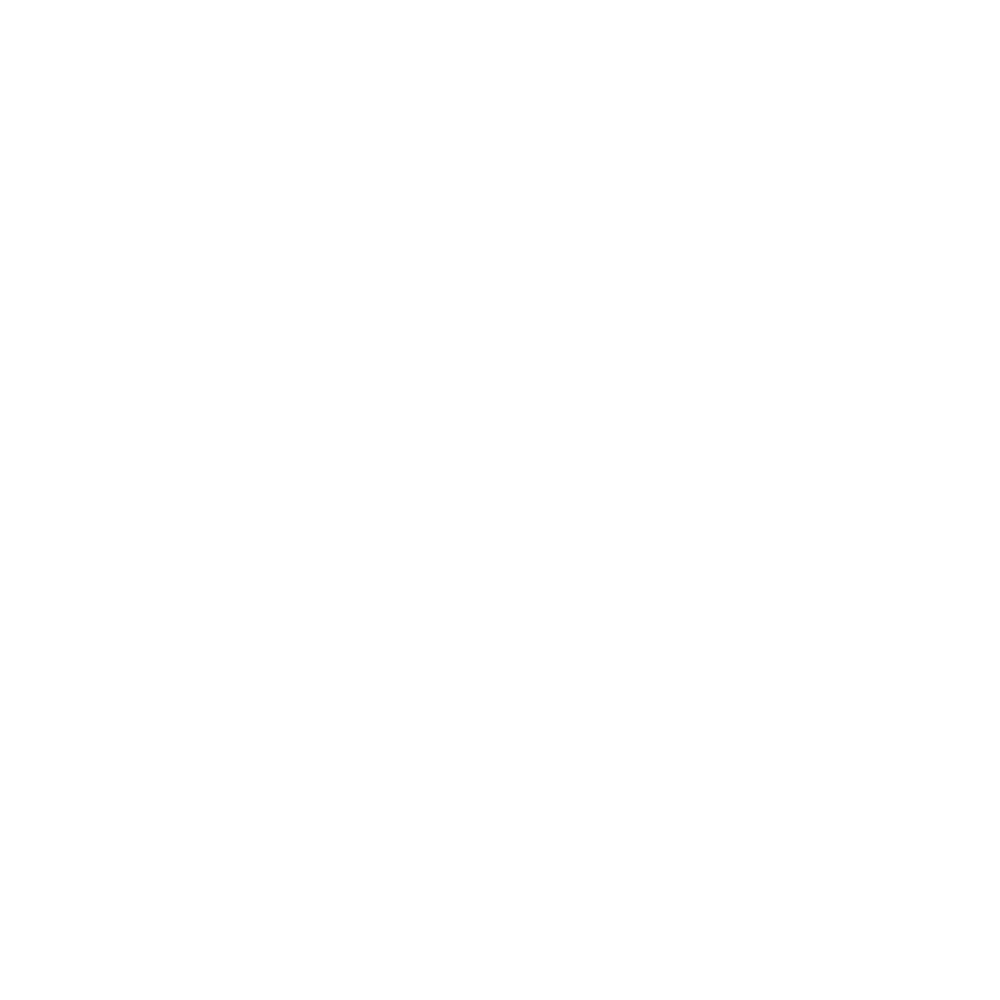

In [4]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

require(rugarch) || {install.packages("rugarch"); require(rugarch)};


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(2,2)
fGARCH Sub-Model	: GARCH
Mean Model	: ARFIMA(2,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error   t value Pr(>|t|)
mu      -2.690485    2.274092 -1.183103 0.236768
ar1     -0.094883    1.319609 -0.071902 0.942680
ar2      0.959363    1.360176  0.705323 0.480609
ma1     -0.057016    1.261845 -0.045184 0.963960
ma2     -0.821364    1.093095 -0.751411 0.452405
mxreg1   1.537387    0.202155  7.605010 0.000000
mxreg2   0.734763    0.140417  5.232727 0.000000
omega  112.098252   51.595568  2.172633 0.029808
alpha1   0.323036    0.040323  8.011266 0.000000
alpha2   0.024512    0.026171  0.936625 0.348952
beta1    0.651452    0.128890  5.054324 0.000000
beta2    0.000000    0.062526  0.000001 0.999999

Robust Standard Errors:
    

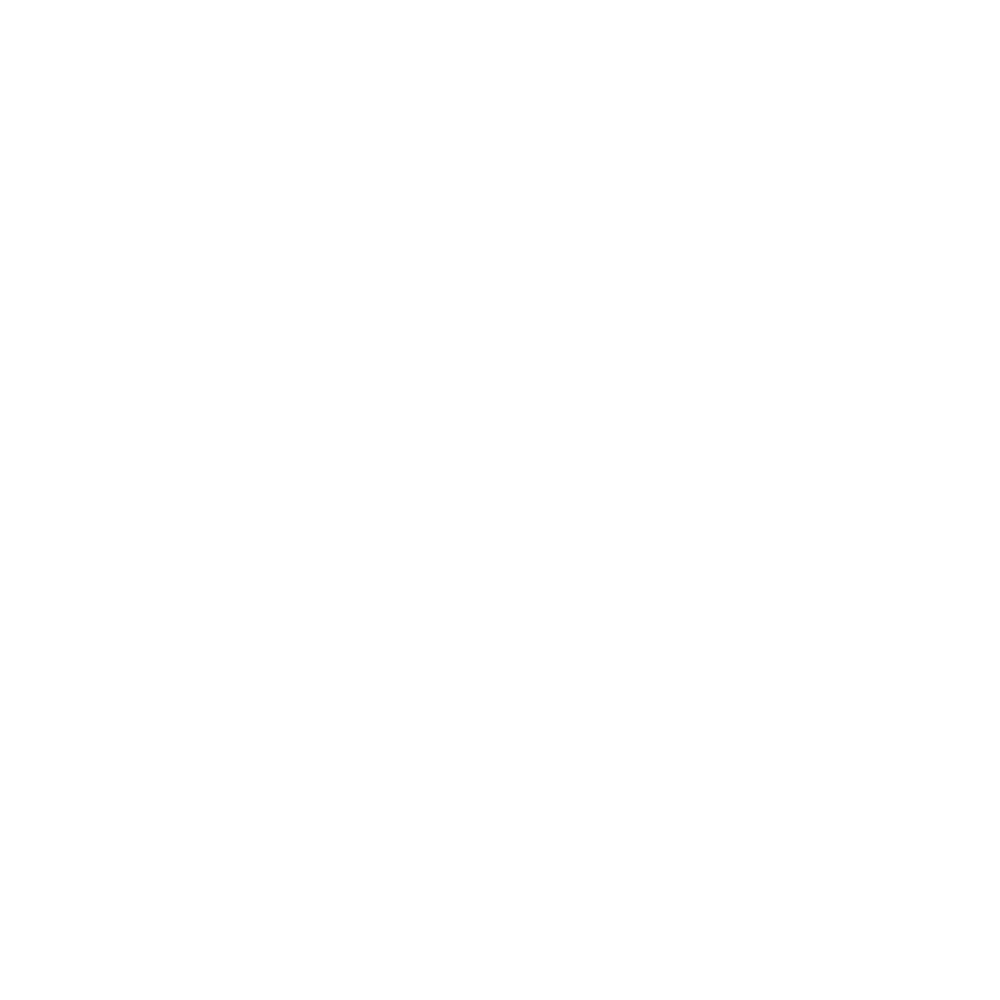

In [5]:
%%R -i df -w 5 -h 5 --units in -r 200
data <- read.csv("B:/Forskning/Papers/paneltime/pt_test/src/simulations/data0.csv", header=TRUE)
ptm <- proc.time()
garchMod <- ugarchspec(
  variance.model=list(model="fGARCH",
                      garchOrder=c(2,2),
                      submodel="GARCH"),
  
  mean.model=list(armaOrder=c(2,2),
                  include.mean=TRUE,
                  external.regressors=data.matrix(subset(data, select=c("X0","X1")))
  ), 
  distribution.model="norm"
)
garchFit <- ugarchfit(spec=garchMod, data=data$Y)
print(garchFit)
print("time:")
print(proc.time() - ptm)

In [ ]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

require(rugarch) || {install.packages("rugarch"); require(rugarch)}

ptm <- proc.time()
garchMod <- ugarchspec(

    variance.model=list(model="fGARCH",
                      garchOrder=c(1,0),
                      submodel="GARCH"),
    
  mean.model=list(armaOrder=c(2,2),
                  include.mean=TRUE,
                  external.regressors=data.matrix(subset(df, select=c("X0","X1")))
  ), 
  distribution.model="norm"
)
garchFit <- ugarchfit(spec=garchMod, data=df$Y)
print(garchFit)
print("time:")
print(proc.time() - ptm)